In [1000]:
# Performance is measured in terms of regret, which is the difference between
# the total value of the learner’s algorithm and that of the best strategy in hindsight.

# 0. Functions, Constant Values and Imports

In [1001]:
import pandas as pd
import numpy as np
from scipy.stats import expon
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pyplot as plt  
warnings.filterwarnings('ignore')

b_coefs, B = [0.01, 0.05, 0.1, 0.5, 1, 2, 20, 100], 100

In [1002]:
# calculate the current values of each strategy's cash and holdings
def aktuelleWerte(strategien, bCoefs, preis):
  Werte = dict()
  for i in range(len(bCoefs)):
    wert = strategien[i]['C'] + preis * strategien[i]['H']
    Werte[i] = wert
  return Werte

def spread_based(strategie_i, pjetzt, pweiter):
  if pjetzt < strategie_i['a_t']:
    strategie_i['a_t'] = pjetzt
    strategie_i['H'] += strategie_i['alpha']
    strategie_i['C'] -= pjetzt * strategie_i['alpha']
  elif pjetzt > strategie_i['a_t'] + strategie_i['b']:
    strategie_i['a_t'] = pjetzt - strategie_i['b']
    strategie_i['H'] -= strategie_i['alpha']
    strategie_i['C'] += pjetzt * strategie_i['alpha']
  else:
    # derselbe Wert bleibt
    strategie_i['a_t'] = strategie_i['a_t']

# calculate the max. value in a dicitionary
def max_wert(werte, erster_wert):
  max = erster_wert
  for schluessel in werte:
    if werte[schluessel] > max:
      max = werte[schluessel]
  return max

# calculate the max. value in a list
def maxWert(list_, erster_wert):
  max = erster_wert
  for l in list_:
    if l > max:
      max = l
  return max

def Delta(df):
  min = df['close'].iloc[1] - df['close'].iloc[0]
  if min < 0:
    min *= -1
  for i in range(1, len(df['close'])):
    if df['close'].iloc[i] - df['close'].iloc[i - 1] > min and df['close'].iloc[i] - df['close'].iloc[i - 1] > 0:
      min = df['close'].iloc[i] - df['close'].iloc[i - 1]
      continue
    if df['close'].iloc[i] - df['close'].iloc[i - 1] < 0:
      wert = (-1) * (df['close'].iloc[i] - df['close'].iloc[i - 1])
      if wert > min:
        min = wert
  # return min + 0.0000000000000001
  return min + np.log(min) + 0.0000000000000001

def Eta(t, B, N, delta):
  return min(1, np.sqrt(np.log(N) / t)) * (1 / (2 * (2 * delta * B + delta**2)))

# calculate V_{t + 1}
def neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte):
  for i in range(len(W_Werte)):
    W_Werte[i] = W_Werte[i] * np.exp(eta * (aktuelle_Werte[i] - neue_Werte[i])) / (mittelwert(W_Werte) * 1)
  return W_Werte

def edit_neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte, Z):
  for i in range(len(W_Werte)):
    W_Werte[i] = W_Werte[i] * np.exp(eta * (aktuelle_Werte[i] - neue_Werte[i])) / (mittelwert(W_Werte) * Z)
  return W_Werte

# calculate a sample mean
def mittelwert(A):
  sum = 0
  for a in A:
    sum += a
  return sum / len(A)

def sum_list(A):
  sum = 0
  for a in A:
    sum += a
  return sum

def performance_on_different_strategies(strategien, werte, p_0, best_matrix):
  strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[0], []
  for j in range(len(b_coefs)):
    strategien[j] = dict()
    strategien[j]['b'] = b_coefs[j]
    strategien[j]['alpha'] = 6
    # "Initially we have C_1 = H_1 = 0."
    strategien[j]['C'] = 0
    strategien[j]['H'] = 0
    strategien[j]['a_t'] = anfangspreis

  x_strategien_2, y_strategien_2 = {}, {}
  x_strategien_2[0], y_strategien_2[0] = [], []
  x_strategien_2[1], y_strategien_2[1] = [], []
  x_strategien_2[2], y_strategien_2[2] = [], []
  x_strategien_2[3], y_strategien_2[3] = [], []
  x_strategien_2[4], y_strategien_2[4] = [], []
  x_strategien_2[5], y_strategien_2[5] = [], []
  x_strategien_2[6], y_strategien_2[6] = [], []
  x_strategien_2[7], y_strategien_2[7] = [], []

  # 2021-08-02
  for t in range(df_trade_counts.iloc[0]['# trades']):
    if t == df_trade_counts.iloc[0]['# trades'] - 1:
      break
    p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
    # Run every strategy S(b)
    aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
    for j in range(len(b_coefs)):
      spread_based(strategien[j], p_jetzt, p_weiter)
      # x_strategien[j] = []
      # y_strategien[j] = []
      x_strategien_2[j].append(t)
      y_strategien_2[j].append(p_jetzt * strategien[j]['H'] + strategien[j]['C'])
    werte.append(aktuelle_Werte)
  # strategien
  # best_matrix.append(['MSFT', df_trade_counts.iloc[0]['date'], df_trade_counts.iloc[0]['# trades'], max_wert(werte[-1], werte[-1][0])])
  # print('The best value on ', df_trade_counts.iloc[0]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')


  x_strategien_6, y_strategien_6 = {}, {}
  x_strategien_6[0], y_strategien_6[0] = [], []
  x_strategien_6[1], y_strategien_6[1] = [], []
  x_strategien_6[2], y_strategien_6[2] = [], []
  x_strategien_6[3], y_strategien_6[3] = [], []
  x_strategien_6[4], y_strategien_6[4] = [], []
  x_strategien_6[5], y_strategien_6[5] = [], []
  x_strategien_6[6], y_strategien_6[6] = [], []
  x_strategien_6[7], y_strategien_6[7] = [], []

  # 2021-08-06
  for t in range(df_trade_counts.iloc[4]['# trades']):
    if t == df_trade_counts.iloc[4]['# trades'] - 1:
      break
    p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
    # Run every strategy S(b)
    aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
    for j in range(len(b_coefs)):
      spread_based(strategien[j], p_jetzt, p_weiter)
      # x_strategien[j] = []
      # y_strategien[j] = []
      x_strategien_6[j].append(t)
      y_strategien_6[j].append(p_jetzt * strategien[j]['H'] + strategien[j]['C'])
    werte.append(aktuelle_Werte)
  # strategien
  # best_matrix.append(['MSFT', df_trade_counts.iloc[4]['date'], df_trade_counts.iloc[4]['# trades'], max_wert(werte[-1], werte[-1][0])])
  # print('The best value on ', df_trade_counts.iloc[0]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')

  fig = make_subplots(rows=2, cols=1, subplot_titles=("02/08/2021", "06/08/2021"))

  fig.add_trace(
      go.Scatter(x = x_strategien_2[0], y = y_strategien_2[0], name="b = 0.01", line = dict(color = '#0856B6', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[1], y = y_strategien_2[1], name="b = 0.05", line = dict(color = '#08B6A8', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[2], y = y_strategien_2[2], name="b = 0.1", line = dict(color = ' #1BB608', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[3], y = y_strategien_2[3], name="b = 0.5", line = dict(color = '#D1CE0B', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[4], y = y_strategien_2[4], name="b = 1", line = dict(color = '#E1850F', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[5], y = y_strategien_2[5], name="b = 2", line = dict(color = ' #E1350F', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[6], y = y_strategien_2[6], name="b = 20", line = dict(color = '#EA1C8C', width=1)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_2[7], y = y_strategien_2[7], name="b = 100", line = dict(color = '#C51CEA ', width=1)),
      row=1, col=1
  )


  fig.update_xaxes(title_text="Number of periods", row=2, col=1)

  fig.update_yaxes(title_text="Total value", row=1, col=1)

  fig.update_yaxes(title_text="Total value", row=2, col=1)

  fig.add_trace(
      go.Scatter(x = x_strategien_6[0], y = y_strategien_6[0], name="b = 0.01", showlegend=False, line = dict(color = '#0856B6', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[1], y = y_strategien_6[1], name="b = 0.05", showlegend=False, line = dict(color = '#08B6A8', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[2], y = y_strategien_6[2], name="b = 0.1", showlegend=False, line = dict(color = ' #1BB608', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[3], y = y_strategien_6[3], name="b = 0.5", showlegend=False, line = dict(color = '#D1CE0B', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[4], y = y_strategien_6[4], name="b = 1", showlegend=False, line = dict(color = '#E1850F', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[5], y = y_strategien_6[5], name="b = 2", showlegend=False, line = dict(color = ' #E1350F', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[6], y = y_strategien_6[6], name="b = 20", showlegend=False, line = dict(color = '#EA1C8C', width=1)),
      row=2, col=1
  )

  fig.add_trace(
      go.Scatter(x = x_strategien_6[7], y = y_strategien_6[7], name="b = 100", showlegend=False, line = dict(color = '#C51CEA ', width=1)),
      row=2, col=1
  )

  fig.update_layout(height=800, width=1000)

  fig.show()

def Danke():
  cm = [[5, 2], [20, 22]]
  ax = plt.subplot()
  sn.heatmap(cm, annot=True, cmap='inferno', annot_kws={'size': 28}, fmt='g', ax=ax)
  ax.set_xlabel('attention!', fontsize=22)
  ax.set_ylabel('for your', fontsize=22)
  ax.set_title('Thank you', fontsize=24)
  ax.xaxis.set_ticklabels(['Group', '#4'], fontsize=14)
  ax.yaxis.set_ticklabels(['yours', 'Sincerely'], fontsize=14)
  plt.show()

def DEUTSCHLAND():
  print('EINIGKEIT UND ReCHT UND FREIHEIT FÜR DAS DEUTSCHE VATERLAND')

# 1. Data preparation

In [1003]:
# [2th - 6th] of August
df_msft = pd.read_csv('msft.csv', names=['datetime', 'open', 'high', 'low', 'close', 'volume'])
df_msft = df_msft.reset_index()
df_msft = df_msft.rename(columns={"index": "date", "datetime": "time"})
df_msft = df_msft.loc[~df_msft['date'].isin(['2021-08-12', '2021-08-11', '2021-08-10', '2021-08-09', '2021-08-08', '2021-08-07'])]
df_msft

,date,time,open,high,low,close,volume
0,2021-08-02,04:00:00,286.70,286.70,286.70,286.70,105
1,2021-08-02,04:03:00,286.70,286.70,286.50,286.50,323
2,2021-08-02,04:05:00,286.77,286.77,286.77,286.77,235
3,2021-08-02,04:06:00,286.89,286.89,286.89,286.89,124
4,2021-08-02,04:07:00,286.90,286.90,286.79,286.79,240
...,...,...,...,...,...,...,...
2594,2021-08-06,18:52:00,289.25,289.25,289.25,289.25,100
2595,2021-08-06,19:28:00,289.15,289.15,289.15,289.15,165
2596,2021-08-06,19:38:00,289.12,289.12,289.12,289.12,355
2597,2021-08-06,19:54:00,289.25,289.25,289.25,289.25,500


In [1004]:
df_trade_counts = df_msft.groupby('date').count()
df_trade_counts = df_trade_counts.rename(columns={'time': '# trades'})
df_trade_counts = df_trade_counts.drop(['open', 'high', 'low', 'close', 'volume'], axis=1)
df_trade_counts = df_trade_counts.reset_index()
df_trade_counts

,date,# trades
0,2021-08-02,512
1,2021-08-03,519
2,2021-08-04,491
3,2021-08-05,519
4,2021-08-06,558


# 2. Data Analysis

## 2.1 The Best Algorithm

In [1005]:
strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[0], []
# anfangspreis (Engl. starting price) - p_0
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
# In the 'strategien' dictionary we save each strategy's characteristics incl. cash, holdings, alpha etc.

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # p_jetzt = p_t
  # p_weiter = p_{t + 1}
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  werte.append(aktuelle_Werte)
# strategien
best_matrix.append(['MSFT', df_trade_counts.iloc[0]['date'], df_trade_counts.iloc[0]['# trades'], max_wert(werte[-1], werte[-1][0])])
# print('The best value on ', df_trade_counts.iloc[0]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')

# 2021-08-03
for t in range(df_trade_counts.iloc[0]['# trades'], df_trade_counts.iloc[1]['# trades']):
  if t == df_trade_counts.iloc[1]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  werte.append(aktuelle_Werte)
# strategien
best_matrix.append(['MSFT', df_trade_counts.iloc[1]['date'], df_trade_counts.iloc[1]['# trades'], max_wert(werte[-1], werte[-1][0])])
# print('The best value on ', df_trade_counts.iloc[1]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')

# 2021-08-04
for t in range(df_trade_counts.iloc[1]['# trades'], df_trade_counts.iloc[2]['# trades']):
  if t == df_trade_counts.iloc[1]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  werte.append(aktuelle_Werte)
# strategien
best_matrix.append(['MSFT', df_trade_counts.iloc[2]['date'], df_trade_counts.iloc[2]['# trades'], max_wert(werte[-1], werte[-1][0])])
# print('The best value on ', df_trade_counts.iloc[2]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')

# 2021-08-05
for t in range(df_trade_counts.iloc[2]['# trades'], df_trade_counts.iloc[3]['# trades']):
  if t == df_trade_counts.iloc[1]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  werte.append(aktuelle_Werte)
# strategien
best_matrix.append(['MSFT', df_trade_counts.iloc[3]['date'], df_trade_counts.iloc[3]['# trades'], max_wert(werte[-1], werte[-1][0])])
# print('The best value on ', df_trade_counts.iloc[3]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')

# 2021-08-06
for t in range(df_trade_counts.iloc[3]['# trades'], df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[1]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  werte.append(aktuelle_Werte)
# strategien
best_matrix.append(['MSFT', df_trade_counts.iloc[4]['date'], df_trade_counts.iloc[4]['# trades'], max_wert(werte[-1], werte[-1][0])])
# print('The best value on ', df_trade_counts.iloc[4]['date'], ' is ', max_wert(werte[-1], werte[-1][0]), '.', sep='')
df_msft_best_results = pd.DataFrame(best_matrix, columns=['ticker', 'date', '# trades', 'best value'])
df_msft_best_results

,ticker,date,# trades,best value
0,MSFT,2021-08-02,512,69.4698
1,MSFT,2021-08-03,519,210.8970
2,MSFT,2021-08-04,491,210.8970
3,MSFT,2021-08-05,519,223.7370
4,MSFT,2021-08-06,558,209.2764


## 2.2 MMMW

In [1006]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
# endergebnis (Engl. the final result) - the list with the final values after T trades.
endergebnis = []
for i in range(len(W[-1])):
  endergebnis.append(W[-1][i] * werte[-1][i])
# print('The best MW-value on ', df_trade_counts.iloc[0]['date'], ' is ', maxWert(endergebnis, endergebnis[0]), '.', sep='')
MMMW_matrix.append(['MSFT', df_trade_counts.iloc[0]['date'], df_trade_counts.iloc[0]['# trades'], maxWert(endergebnis, endergebnis[0])])

# 2021-08-03
for t in range(df_trade_counts.iloc[0]['# trades'], df_trade_counts.iloc[1]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
endergebnis = []
for i in range(len(W[-1])):
  endergebnis.append(W[-1][i] * werte[-1][i])
# print('The best MW-value on ', df_trade_counts.iloc[1]['date'], ' is ', maxWert(endergebnis, endergebnis[0]), '.', sep='')
MMMW_matrix.append(['MSFT', df_trade_counts.iloc[1]['date'], df_trade_counts.iloc[1]['# trades'], maxWert(endergebnis, endergebnis[0])])

# 2021-08-04
for t in range(df_trade_counts.iloc[1]['# trades'], df_trade_counts.iloc[2]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
endergebnis = []
for i in range(len(W[-1])):
  endergebnis.append(W[-1][i] * werte[-1][i])
# print('The best MW-value on ', df_trade_counts.iloc[2]['date'], ' is ', maxWert(endergebnis, endergebnis[0]), '.', sep='')
MMMW_matrix.append(['MSFT', df_trade_counts.iloc[2]['date'], df_trade_counts.iloc[2]['# trades'], maxWert(endergebnis, endergebnis[0])])

# 2021-08-05
for t in range(df_trade_counts.iloc[2]['# trades'], df_trade_counts.iloc[3]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
endergebnis = []
for i in range(len(W[-1])):
  endergebnis.append(W[-1][i] * werte[-1][i])
# print('The best MW-value on ', df_trade_counts.iloc[3]['date'], ' is ', maxWert(endergebnis, endergebnis[0]), '.', sep='')
MMMW_matrix.append(['MSFT', df_trade_counts.iloc[3]['date'], df_trade_counts.iloc[3]['# trades'], maxWert(endergebnis, endergebnis[0])])

# 2021-08-06
for t in range(df_trade_counts.iloc[0]['# trades'], df_trade_counts.iloc[1]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
endergebnis = []
for i in range(len(W[-1])):
  endergebnis.append(W[-1][i] * werte[-1][i])
# print('The best MW-value on ', df_trade_counts.iloc[4]['date'], ' is ', maxWert(endergebnis, endergebnis[0]), '.', sep='')
MMMW_matrix.append(['MSFT', df_trade_counts.iloc[4]['date'], df_trade_counts.iloc[4]['# trades'], maxWert(endergebnis, endergebnis[0])])
df_msft_MMMW_results = pd.DataFrame(MMMW_matrix, columns=['ticker', 'date', '# trades', 'MMMW value'])
df_msft_MMMW_results

,ticker,date,# trades,MMMW value
0,MSFT,2021-08-02,512,219.963950
1,MSFT,2021-08-03,519,509.987612
2,MSFT,2021-08-04,491,509.987612
3,MSFT,2021-08-05,519,279.338275
4,MSFT,2021-08-06,558,569.580104


## 2.3 MMFPL

In [1007]:
delta = Delta(df_msft)
eta = (1 / (2 * (2 * delta * B + delta**2))) * np.sqrt(np.log(len(b_coefs)) / df_trade_counts['# trades'].iloc[0])
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
W_Werte, W, werte, FPL_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
# W_Werte = [w_i]
# werte = [V_t]

# 2021-08-02
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
endergebnis = []
for i in range(len(werte[-1])):
  endergebnis.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
# print('The best FPL-value on ', df_trade_counts.iloc[0]['date'], ' is ', np.max(endergebnis), '.', sep='')
FPL_matrix.append(['MSFT', df_trade_counts.iloc[0]['date'], df_trade_counts.iloc[0]['# trades'], np.max(endergebnis)])

# 2021-08-03
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[0]['# trades'], df_trade_counts.iloc[1]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
endergebnis = []
for i in range(len(werte[-1])):
  endergebnis.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
# print('The best FPL-value on ', df_trade_counts.iloc[0]['date'], ' is ', np.max(endergebnis), '.', sep='')
FPL_matrix.append(['MSFT', df_trade_counts.iloc[1]['date'], df_trade_counts.iloc[1]['# trades'], np.max(endergebnis)])

# 2021-08-04
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[1]['# trades'], df_trade_counts.iloc[2]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
endergebnis = []
for i in range(len(werte[-1])):
  endergebnis.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
# print('The best FPL-value on ', df_trade_counts.iloc[0]['date'], ' is ', np.max(endergebnis), '.', sep='')
FPL_matrix.append(['MSFT', df_trade_counts.iloc[2]['date'], df_trade_counts.iloc[2]['# trades'], np.max(endergebnis)])

# 2021-08-05
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[2]['# trades'], df_trade_counts.iloc[3]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
endergebnis = []
for i in range(len(werte[-1])):
  endergebnis.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
# print('The best FPL-value on ', df_trade_counts.iloc[0]['date'], ' is ', np.max(endergebnis), '.', sep='')
FPL_matrix.append(['MSFT', df_trade_counts.iloc[3]['date'], df_trade_counts.iloc[3]['# trades'], np.max(endergebnis)])

# 2021-08-06
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[3]['# trades'], df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
endergebnis = []
for i in range(len(werte[-1])):
  endergebnis.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
# print(np.array(endergebnis))
# print('The best FPL-value on ', df_trade_counts.iloc[0]['date'], ' is ', np.max(endergebnis), '.', sep='')
FPL_matrix.append(['MSFT', df_trade_counts.iloc[4]['date'], df_trade_counts.iloc[4]['# trades'], np.max(endergebnis)])
df_msft_FPL_results = pd.DataFrame(FPL_matrix, columns=['ticker', 'date', '# trades', 'FPL value'])
df_msft_FPL_results

,ticker,date,# trades,FPL value
0,MSFT,2021-08-02,512,27.23580
1,MSFT,2021-08-03,519,116.01765
2,MSFT,2021-08-04,491,116.01765
3,MSFT,2021-08-05,519,65.09265
4,MSFT,2021-08-06,558,132.60765


# 3. Visualization

## 2021-08-02, the Best Algorithm

In [1008]:
strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[0], []
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  # werte.append(aktuelle_Werte)
  history[t] = aktuelle_Werte

x_history_best_2, y_history_best_2 = [], []
for schluessel in history: # schluessel (Engl. key) - a key in a dictionary
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_best_2.append(schluessel)
  y_history_best_2.append(max_wert(history[schluessel], history[schluessel][0]))

## 2021-08-02, the MMMW Algorithm

In [1009]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_2, y_history_MMMW_2 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_2.append(schluessel)
  y_history_MMMW_2.append(np.max(np.array(history[schluessel])))

## 2021-08-02, the MMFPL Algorithm

In [1010]:
delta = Delta(df_msft)
eta = (1 / (2 * (2 * delta * B + delta**2))) * np.sqrt(np.log(len(b_coefs)) / df_trade_counts['# trades'].iloc[0])
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
W_Werte, W, werte, FPL_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
history = dict()

# 2021-08-02
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
  zu_appenden = []
  for i in range(len(werte[-1])):
    zu_appenden.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
  history[t] = zu_appenden

x_history_MMFPL_2, y_history_MMFPL_2 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMFPL_2.append(schluessel)
  y_history_MMFPL_2.append(np.max(np.array(history[schluessel])))

## 2021-08-06, the Best Algorithm

In [1011]:
strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[1031], []
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-06
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  # werte.append(aktuelle_Werte)
  history[t] = aktuelle_Werte

x_history_best_6, y_history_best_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_best_6.append(schluessel)
  y_history_best_6.append(max_wert(history[schluessel], history[schluessel][0]))

## 2021-08-06, the MMMW Algorithm

In [1012]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[1031]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-06
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_6, y_history_MMMW_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_6.append(schluessel)
  y_history_MMMW_6.append(np.max(np.array(history[schluessel])))

## 2021-08-06, the MMFPL Algorithm

In [1013]:
delta = Delta(df_msft)
eta = (1 / (2 * (2 * delta * B + delta**2))) * np.sqrt(np.log(len(b_coefs)) / df_trade_counts['# trades'].iloc[4])
strategien, anfangspreis = dict(), df_msft['close'].iloc[1031]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
W_Werte, W, werte, FPL_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
history = dict()

# 2021-08-06
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
  zu_appenden = []
  for i in range(len(werte[-1])):
    zu_appenden.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
  history[t] = zu_appenden

x_history_MMFPL_6, y_history_MMFPL_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMFPL_6.append(schluessel)
  y_history_MMFPL_6.append(np.max(np.array(history[schluessel])))

## Grafiken

### Algorithm Performance Graphs

In [1014]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("MSFT 02/08/2021","MSFT 06/08/2021"))

fig.add_trace(
    go.Scatter(x = x_history_best_2, y = y_history_best_2, name="Best", line = dict(color = '#1042D5', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_MMMW_2, y = y_history_MMMW_2, name="MMMW", line = dict(color = '#0CDED9', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_MMFPL_2, y = y_history_MMFPL_2, name="MMFPL", line = dict(color = '#30B608', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_best_6, y = y_history_best_6, name="Best", showlegend=False, line = dict(color = '#1042D5', width=1)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x = x_history_MMMW_6, y = y_history_MMMW_6, name="MMMW", showlegend=False, line = dict(color = '#0CDED9', width=1)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x = x_history_MMFPL_6, y = y_history_MMFPL_6, name="MMFPL", showlegend=False, line = dict(color = '#30B608', width=1)),
    row=1, col=2
)


fig.update_xaxes(title_text="Number of periods", row=1, col=1)

fig.update_yaxes(title_text="Total value", row=1, col=1)

fig.update_xaxes(title_text="Number of periods", row=1, col=2)

fig.update_yaxes(title_text="Total value", row=1, col=2)

fig.show()


### Performance of Different Strategies

In [1015]:
performance_on_different_strategies(strategien, werte, anfangspreis, best_matrix)

# 4. Improvement

Firstly, we realize that the MMMW algorithm based on our data deviates too much from the algortihm predicting the best values (the MMFPL algorithm in our case) in the most accurate way.

Secondly, it is known that
$$
w_{t+1}(b) := \frac{w_t(b) \cdot e^{\eta_t(V_{t+1}(b) - V_t(b))}}{Z_t} \cdot
$$


So theoretically, it would be useful to **edit the normalization constant** so that the values produced by the MMMW algorithm would approximate the best values more accurately.

Then we are going to calculate the list of ratios of each MMMW value to each MMFPL value (correspondingly) and take its sample mean.

Thus, we are ready to reimplement the MMMW function by adding our new value of $Z_t$.

## 2021-08-02 The Best Algorithm (For Improvement)

In [1016]:
strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[0], []
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  # werte.append(aktuelle_Werte)
  history[t] = aktuelle_Werte

x_history_best_2, y_history_best_2 = [], []
for schluessel in history: # schluessel (Engl. key) - a key in a dictionary
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_best_2.append(schluessel)
  y_history_best_2.append(max_wert(history[schluessel], history[schluessel][0]))

## 2021-08-02, the MMMW Algorithm (For Improvement)

In [1017]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_2, y_history_MMMW_2 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_2.append(schluessel)
  y_history_MMMW_2.append(np.max(np.array(history[schluessel])))

## 2021-08-02, the MMFPL Algorithm (For Improvement)

In [1018]:
delta = Delta(df_msft)
eta = (1 / (2 * (2 * delta * B + delta**2))) * np.sqrt(np.log(len(b_coefs)) / df_trade_counts['# trades'].iloc[0])
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
W_Werte, W, werte, FPL_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
history = dict()

# 2021-08-02
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
  zu_appenden = []
  for i in range(len(werte[-1])):
    zu_appenden.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
  history[t] = zu_appenden

x_history_MMFPL_2, y_history_MMFPL_2 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMFPL_2.append(schluessel)
  y_history_MMFPL_2.append(np.max(np.array(history[schluessel])))

In [1019]:
ratios = []
for i in range(len(y_history_MMMW_2)):
  ratios.append(y_history_MMMW_2[i] / y_history_MMFPL_2[i])
mean = np.mean(np.array(ratios))

## 2021-08-02 MMMW recalculation (with the already edited $Z_t$)

In [1020]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[0]['# trades']):
  if t == df_trade_counts.iloc[0]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = edit_neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte, mean / 2)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_2, y_history_MMMW_2 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_2.append(schluessel)
  y_history_MMMW_2.append(np.max(np.array(history[schluessel])))

## 2021-08-06, the Best Algorithm (For Improvement)

In [1021]:
strategien, werte, anfangspreis, best_matrix = dict(), [], df_msft['close'].iloc[1031], []
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-06
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  # Run every strategy S(b)
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  # werte.append(aktuelle_Werte)
  history[t] = aktuelle_Werte

x_history_best_6, y_history_best_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_best_6.append(schluessel)
  y_history_best_6.append(max_wert(history[schluessel], history[schluessel][0]))

## 2021-08-06, the MMMW Algorithm (For Improvement)

In [1022]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[1031]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-06
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_6, y_history_MMMW_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_6.append(schluessel)
  y_history_MMMW_6.append(np.max(np.array(history[schluessel])))

## 2021-08-06, the MMFPL Algorithm (For Improvement)

In [1023]:
delta = Delta(df_msft)
eta = (1 / (2 * (2 * delta * B + delta**2))) * np.sqrt(np.log(len(b_coefs)) / df_trade_counts['# trades'].iloc[4])
strategien, anfangspreis = dict(), df_msft['close'].iloc[1031]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
W_Werte, W, werte, FPL_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
history = dict()

# 2021-08-06
p_b = expon.pdf(b_coefs, 0, 1/eta)
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  werte.append(aktuelle_Werte)
  W_Werte.append([])
  for j in range(len(b_coefs)):
    V_plus_p_andere_Werte = []
    spread_based(strategien[j], p_jetzt, p_weiter)
    V_plus_p = strategien[j]['C'] + p_b[j] * strategien[j]['H']
    for i in range(len(b_coefs)):
      V_plus_p_andere_Werte.append(strategien[i]['C'] + p_b[i] * strategien[i]['H'])
    anzahl = 0
    for zahl in V_plus_p_andere_Werte:
      if V_plus_p >= zahl:
        anzahl += 1
    pr = anzahl / len(b_coefs)
    w_t = pr
    # W_Werte[t][j] = w_t
    W_Werte[-1].append([j, w_t])
  zu_appenden = []
  for i in range(len(werte[-1])):
    zu_appenden.append(float(werte[-1][i] * W_Werte[-1][i][-1]))
  history[t] = zu_appenden

x_history_MMFPL_6, y_history_MMFPL_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMFPL_6.append(schluessel)
  y_history_MMFPL_6.append(np.max(np.array(history[schluessel])))

In [1024]:
ratios = []
for i in range(len(y_history_MMMW_6)):
  ratios.append(y_history_MMMW_6[i] / y_history_MMFPL_6[i])
mean = np.mean(np.array(ratios))

## 2021-08-06 MMMW recalculation (with the already edited $Z_t$)

In [1025]:
delta = Delta(df_msft)
W_Werte, W, werte, MMMW_matrix = [1 / 8 for i in range(len(b_coefs))], [], [], []
W_Werte_reserve = W_Werte
strategien, anfangspreis = dict(), df_msft['close'].iloc[0]
for j in range(len(b_coefs)):
  strategien[j] = dict()
  strategien[j]['b'] = b_coefs[j]
  strategien[j]['alpha'] = 6
  # "Initially we have C_1 = H_1 = 0."
  strategien[j]['C'] = 0
  strategien[j]['H'] = 0
  strategien[j]['a_t'] = anfangspreis
history = dict()

# 2021-08-02
for t in range(df_trade_counts.iloc[4]['# trades']):
  if t == df_trade_counts.iloc[4]['# trades'] - 1:
    break
  p_jetzt, p_weiter = df_msft['close'].iloc[t], df_msft['close'].iloc[t + 1]
  aktuelle_Werte = aktuelleWerte(strategien, b_coefs, p_jetzt)
  neue_Werte = aktuelleWerte(strategien, b_coefs, p_weiter)
  for j in range(len(b_coefs)):
    spread_based(strategien[j], p_jetzt, p_weiter)
  eta = Eta(t, B, len(b_coefs), delta)
  W.append(W_Werte)
  werte.append(aktuelle_Werte)
  W_Werte = edit_neue_W_Werte(W_Werte, eta, aktuelle_Werte, neue_Werte, mean / 2)
  zu_appenden = []
  for i in range(len(W[-1])):
    zu_appenden.append(W[-1][i] * werte[-1][i])
  history[t] = zu_appenden

x_history_MMMW_6, y_history_MMMW_6 = [], []
for schluessel in history:
  if schluessel == 0 or schluessel == 1:
    continue
  x_history_MMMW_6.append(schluessel)
  y_history_MMMW_6.append(np.max(np.array(history[schluessel])))

## Graphs

### Algorithm Performance

In [1026]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("MSFT 02/08/2021","MSFT 06/08/2021"))

fig.add_trace(
    go.Scatter(x = x_history_best_2, y = y_history_best_2, name="Best", line = dict(color = '#1042D5', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_MMMW_2, y = y_history_MMMW_2, name="MMMW", line = dict(color = '#0CDED9', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_MMFPL_2, y = y_history_MMFPL_2, name="MMFPL", line = dict(color = '#30B608', width=1)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x = x_history_best_6, y = y_history_best_6, name="Best", showlegend=False, line = dict(color = '#1042D5', width=1)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x = x_history_MMMW_6, y = y_history_MMMW_6, name="MMMW", showlegend=False, line = dict(color = '#0CDED9', width=1)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x = x_history_MMFPL_6, y = y_history_MMFPL_6, name="MMFPL", showlegend=False, line = dict(color = '#30B608', width=1)),
    row=1, col=2
)


fig.update_xaxes(title_text="Number of periods", row=1, col=1)

fig.update_yaxes(title_text="Total value", row=1, col=1)

fig.update_xaxes(title_text="Number of periods", row=1, col=2)

fig.update_yaxes(title_text="Total value", row=1, col=2)

fig.show()


### Performance on Different Strategies

In [1027]:
performance_on_different_strategies(strategien, werte, anfangspreis, best_matrix)

# P.S.

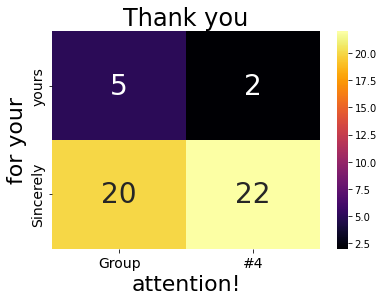

In [1028]:
Danke()